In [10]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import pandas as pd
from scipy import stats

In [ ]:
def update_func(state, t, system, dvdt):
    """Update the thermal transfer model.
    
    State objects:
    Temperature of vessle
    Volume of vessle
    
    t --> time
    T --> Temperature
    
    returns: State object containing the stocks
    """
    unpack(system)
    
    Tstock = state.Tstock
    Vstock = state.Vstock
    
    dTdt = -r * (T - T_env)
    # dvdt is passed in as an argument - it is being swept
    
    Tstock += dTdt * dt
    Vstock += dvdt * dt
    
    return State(T=T, V=V)

In [ ]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[0] = init
    ts = linrange(0, t_end, dt)
    
    for t in ts:
        frame.row[t+dt] = update_func(frame.row[t], t, system)
        
    # store the final temperature in T_final
    system.T_final = get_last_value(frame.T)
    
    return frame

In [1]:
# Done
def make_system(t_init, m, t_end, dvdt):
    """Makes a System object with the given parameters.

    t_init: initial temperature in degC
    r: heat transfer rate - when run, a function of r will be substituted in for it
    t_end: end time of simulation
    t_env: temperature of the environment
    dt: time step
    
    returns: System object
    """
    init = State(t=t_init)
    
    # t_final is used to store the final temperature.
    # Before the simulation runs, t_final = t_init
    t_final = t_init

    T_env = 25
    dt = 1
    
    return System(locals())


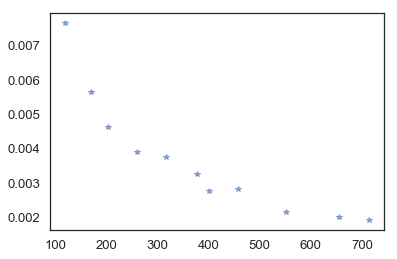

In [55]:
data = {'Volume': [118.354, 169.507,202.606,258.774,316.948,377.128,401.2,458.371,551.65,654.959,714.136,], 
             'r': [0.007660215,0.00563342,0.004614561,0.003912183,0.003744291,0.003259004,0.002769218,
                   0.002814454,0.002157224,0.001998175,0.001906878]}
r_vs_volume_data = pd.DataFrame(data=data)
plot(r_vs_volume_data['Volume'], r_vs_volume_data['r'], '*')

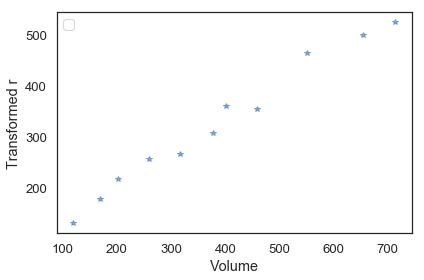

In [56]:
data2 = {'Volume': r_vs_volume_data['Volume'], 'Transformed r': 1 / r_vs_volume_data['r']}
r_vs_volume_transformed_data = pd.DataFrame(data=data2)
plot(r_vs_volume_transformed_data['Volume'], r_vs_volume_transformed_data['Transformed r'], '*')
decorate(xlabel = 'Volume', ylabel = 'Transformed r')


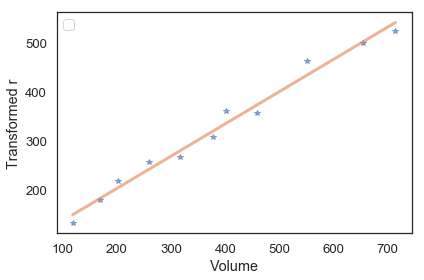

In [57]:
x = r_vs_volume_transformed_data['Volume']
y = r_vs_volume_transformed_data['Transformed r']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)


def r_linear_function(slope, intercept, volume):
    r = slope * volume + intercept
    return r
r_plot = r_linear_function(slope, intercept, r_vs_volume_transformed_data['Volume'])

def plot_linear_on_data():
    plot(r_vs_volume_transformed_data['Volume'], r_vs_volume_transformed_data['Transformed r'], '*')
    decorate(xlabel = 'Volume', ylabel = 'Transformed r')
    plot(r_vs_volume_transformed_data['Volume'], r_plot)

plot_linear_on_data()

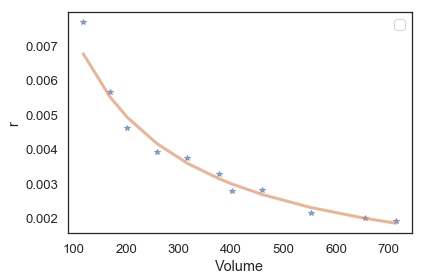

In [59]:
def unflipper(r_linear_function, slope, intercept, volume):
    r = r_linear_function(slope, intercept, volume) ** -1
    return r

r_nonlinear_function = unflipper(r_linear_function, slope, intercept, r_vs_volume_transformed_data['Volume'])

def plot_nonlinear_on_data():
    plot(r_vs_volume_data['Volume'], r_vs_volume_data['r'], '*')
    decorate(xlabel = 'Volume', ylabel = 'r')
    plot(r_vs_volume_data['Volume'], r_nonlinear_function)

plot_nonlinear_on_data()